In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('E:\\Github\\credit-card-fraud-detection\\data\\creditcard_2023.csv')

# Display the first few rows of the dataset
print(data.head())

# Get basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

Missing values in each column:
id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class distribution:
Class
0    284315
1    284315
Name: count, dtype: int64

Number of Fraud Cases: 284315
Number of Non-Fraud Cases: 284315


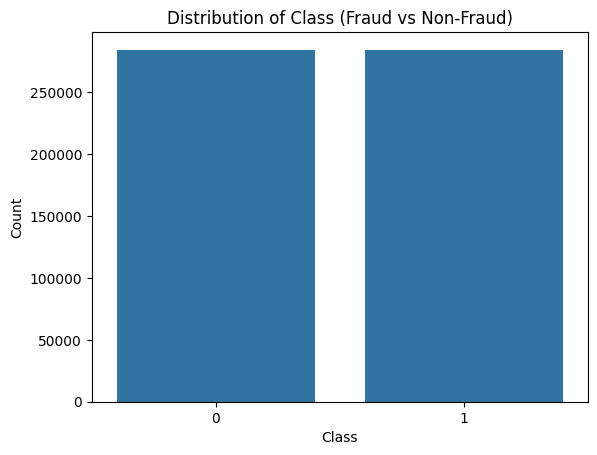

                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.00000

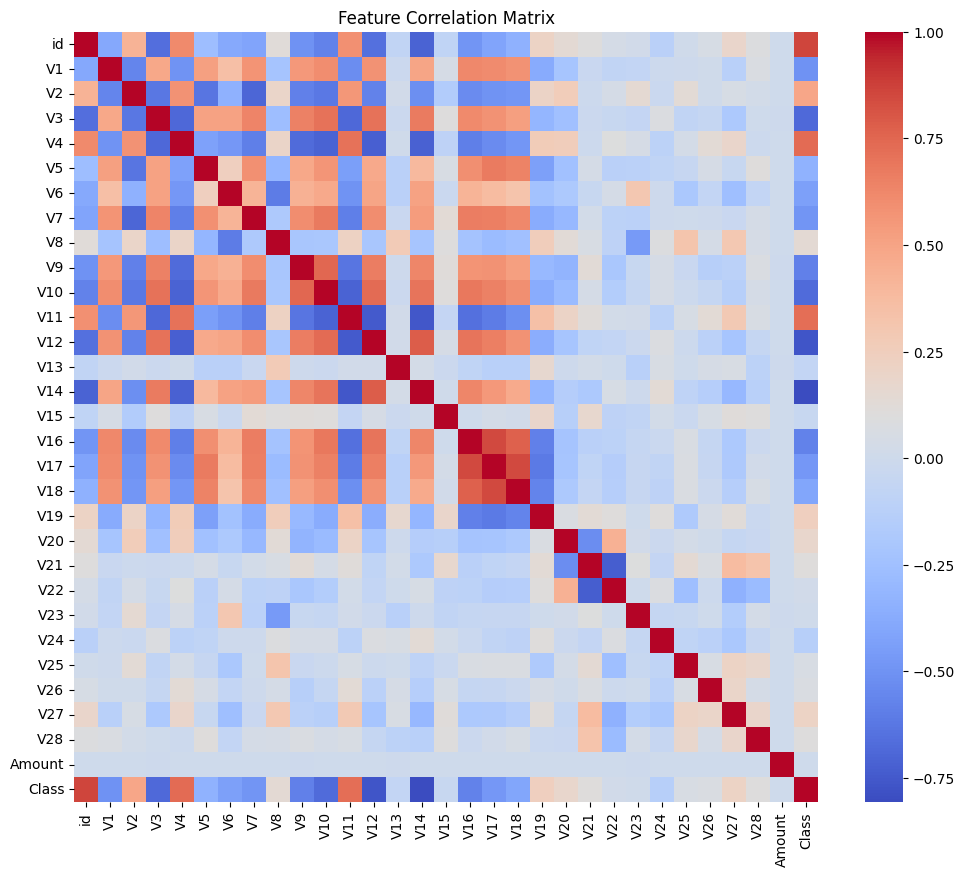

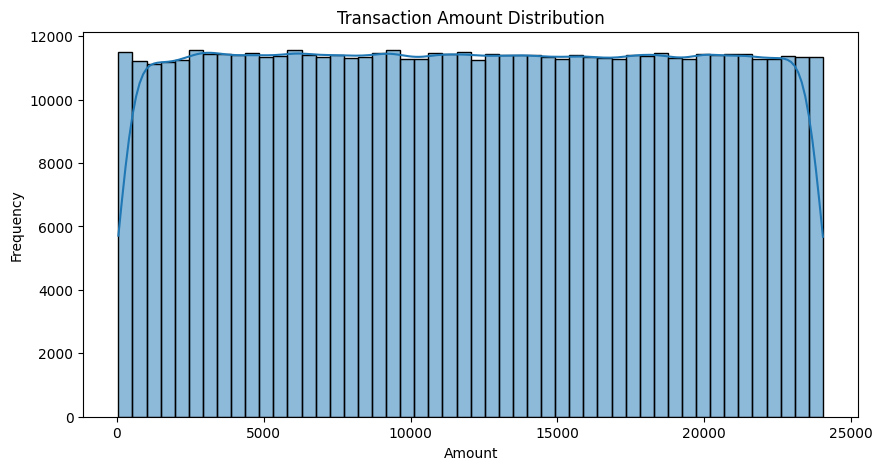

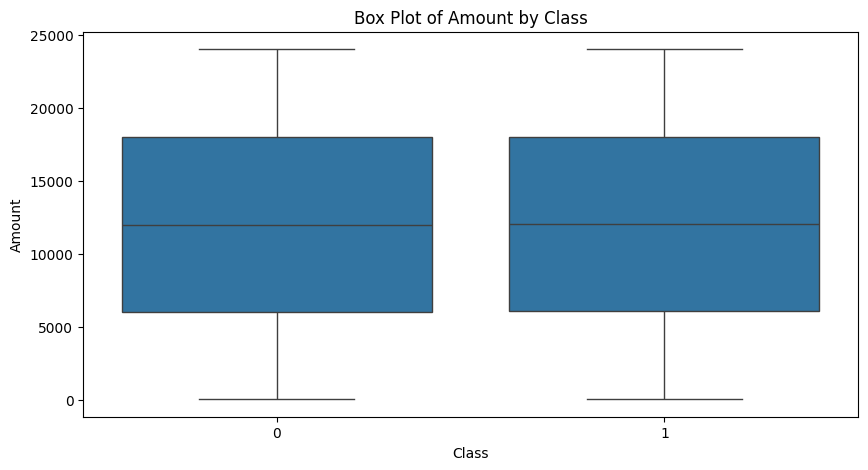

Column names in the dataset:
Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


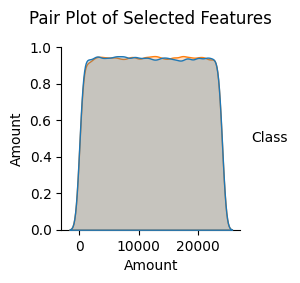

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Class distribution
class_counts = data['Class'].value_counts()
print("\nClass distribution:")
print(class_counts)

# Extract the counts for further analysis
num_fraud = class_counts[1]
num_non_fraud = class_counts[0]
print(f'\nNumber of Fraud Cases: {num_fraud}')
print(f'Number of Non-Fraud Cases: {num_non_fraud}')

# Visualize class distribution
sns.countplot(x='Class', data=data)
plt.title('Distribution of Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Summary statistics
print(data.describe())

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

# Distribution of Amount
plt.figure(figsize=(10, 5))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Box plot of Amount by Class
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Box Plot of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

# Check the column names
print("Column names in the dataset:")
print(data.columns)

# Pair plot of selected features (adjust vars as needed)
# Replace 'Time' with an actual column name from the dataset
sns.pairplot(data, hue='Class', vars=['Amount'])  # Adjust the vars list based on available columns
plt.title('Pair Plot of Selected Features')
plt.show()


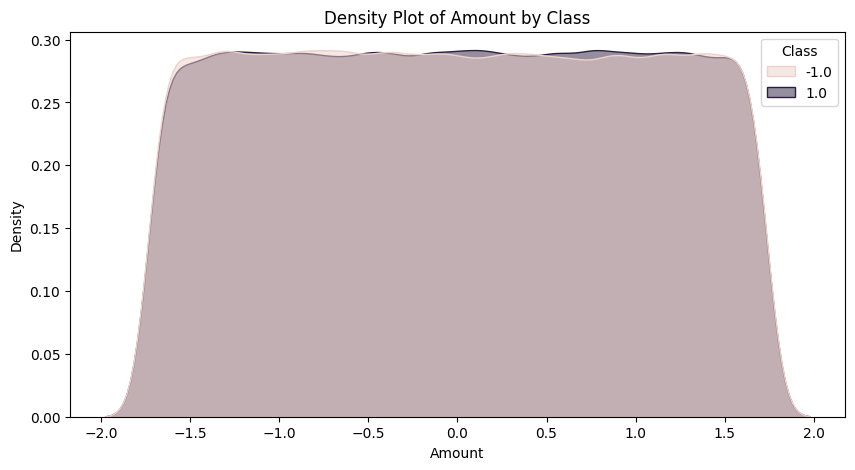

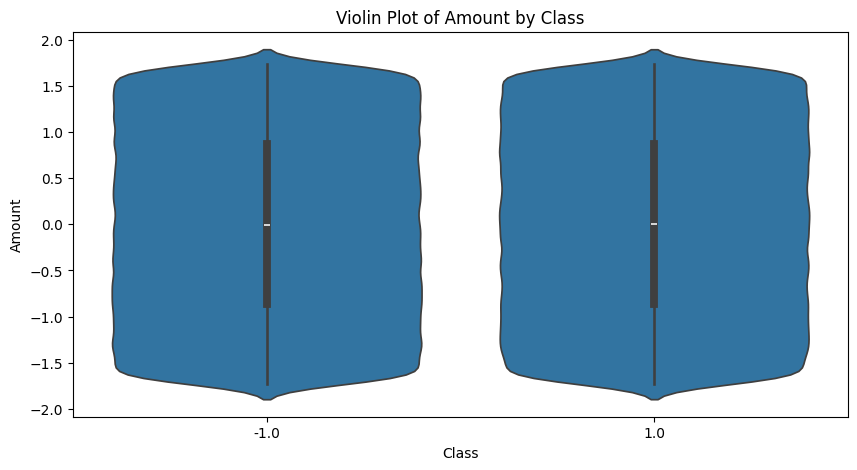

Train and test split done.


In [3]:
# Scaling features using StandardScaler
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Scale numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Density plot of Amount by Class
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x='Amount', hue='Class', fill=True, common_norm=False, alpha=0.5)
plt.title('Density Plot of Amount by Class')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

# Violin plot for Amount
plt.figure(figsize=(10, 5))
sns.violinplot(x='Class', y='Amount', data=data)
plt.title('Violin Plot of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

# Train-test split
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train and test split done.")


In [7]:
# Example of data preprocessing
# Assuming 'data' is your DataFrame and 'Class' is your target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model.__class__.__name__} ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}\n")

# Logistic Regression
lr_model = LogisticRegression()
evaluate_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, X_train, y_train, X_test, y_test)

# Random Forest
rf_model = RandomForestClassifier()
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
evaluate_model(gb_model, X_train, y_train, X_test, y_test)

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Neural Network
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate Neural Network
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Neural Network Accuracy: {nn_accuracy}\n')


LogisticRegression Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56750
         1.0       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

LogisticRegression ROC AUC Score: 0.9998771171291537

DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56750
         1.0       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

DecisionTreeClassifier ROC AUC Score: 0.9995337386048319

RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.0

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [-1.  1.]